## Installing Dependencies into Virtual Environment

In [4]:
import warnings; 
warnings.simplefilter('ignore')

In [5]:
import pandas as pd
import pyarrow
import fastparquet
from prophet import Prophet
import matplotlib.pyplot as plt 

## Reading in My Parquet Files Using pandas

In [88]:
#reading 2019 data into a df
path = "./data/output/sales directory"
partition = "Reportyear=2019"
partition2 = "Reportyear=2020"
fullpath = f"{path}/{partition}"
fullpath2 = f"{path}/{partition2}"
sales_2019_df = pd.read_parquet(fullpath,engine='pyarrow')
sales_2020_df = pd.read_parquet(fullpath2,engine='pyarrow')

In [21]:
sales_2019_df.head()

,OrderID,Product,Quantity,Price,OrderDate,StoreAddress,City,State,Month
0,141234,iPhone,1,700.000000,2019-01-23 02:25:00,"944 Walnut St, Boston, MA 02215",Boston,MA,1
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 19:15:00,"185 Maple St, Portland, OR 97035",Portland,OR,1
2,141236,Wired Headphones,2,11.990000,2019-01-17 18:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,CA,1
3,141237,27in FHD Monitor,1,149.990005,2019-01-06 01:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA,1
4,141238,Wired Headphones,1,11.990000,2019-01-25 16:59:00,"387 10th St, Austin, TX 73301",Austin,TX,1


In [89]:
sales_2020_df.head()

,OrderID,Product,Quantity,Price,OrderDate,StoreAddress,City,State,Month
0,297150,Lightning Charging Cable,1,14.95,2020-01-01 05:38:00,"427 Wilson St, Dallas, TX 75001",Dallas,TX,1
1,297817,iPhone,1,700.00,2020-01-01 05:22:00,"519 13th St, New York City, NY 10001",New York City,NY,1
2,297817,Lightning Charging Cable,2,14.95,2020-01-01 05:22:00,"519 13th St, New York City, NY 10001",New York City,NY,1
3,297969,Google Phone,1,600.00,2020-01-01 05:54:00,"542 2nd St, San Francisco, CA 94016",San Francisco,CA,1
4,298344,Wired Headphones,4,11.99,2020-01-01 08:34:00,"731 7th St, New York City, NY 10001",New York City,NY,1


In [22]:
sales_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185916 entries, 0 to 185915
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   OrderID       185916 non-null  int32         
 1   Product       185916 non-null  object        
 2   Quantity      185916 non-null  int32         
 3   Price         185916 non-null  float32       
 4   OrderDate     185916 non-null  datetime64[ns]
 5   StoreAddress  185916 non-null  object        
 6   City          185916 non-null  object        
 7   State         185916 non-null  object        
 8   Month         185916 non-null  category      
dtypes: category(1), datetime64[ns](1), float32(1), int32(2), object(4)
memory usage: 9.4+ MB


In [90]:
sales_2019_df.describe([0.25,0.50,0.75,0.99]).T

,count,mean,min,25%,50%,75%,99%,max,std
OrderID,185916.0,230403.546526,141234.0,185822.75,230351.5,275015.25,317871.85,319670.0,51506.924899
Quantity,185916.0,1.124368,1.0,1.0,1.0,1.0,3.0,9.0,0.442749
Price,185916.0,184.387726,2.99,11.95,14.95,150.0,1700.0,1700.0,332.736389
OrderDate,185916,2019-07-19 01:32:38.629058048,2019-01-01 08:07:00,2019-04-17 00:52:00,2019-07-18 00:09:30,2019-10-26 10:58:00,2019-12-29 23:23:24,2020-01-01 04:53:00,NaN


In [24]:
#Create new columns 
sales_2019_df['TotalRevenue'] = round(sales_2019_df['Quantity']*sales_2019_df['Price'],3)

In [25]:
sales_2019_df.head()

,OrderID,Product,Quantity,Price,OrderDate,StoreAddress,City,State,Month,TotalRevenue
0,141234,iPhone,1,700.000000,2019-01-23 02:25:00,"944 Walnut St, Boston, MA 02215",Boston,MA,1,700.00
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 19:15:00,"185 Maple St, Portland, OR 97035",Portland,OR,1,14.95
2,141236,Wired Headphones,2,11.990000,2019-01-17 18:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,CA,1,23.98
3,141237,27in FHD Monitor,1,149.990005,2019-01-06 01:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA,1,149.99
4,141238,Wired Headphones,1,11.990000,2019-01-25 16:59:00,"387 10th St, Austin, TX 73301",Austin,TX,1,11.99


In [26]:
sales_2019_df.columns

Index(['OrderID', 'Product', 'Quantity', 'Price', 'OrderDate', 'StoreAddress',
       'City', 'State', 'Month', 'TotalRevenue'],
      dtype='object')

In [30]:
#Unique Products in our dataset

products = list(sales_2019_df['Product'].unique())
products

['iPhone',
 'Lightning Charging Cable',
 'Wired Headphones',
 '27in FHD Monitor',
 'AAA Batteries (4-pack)',
 '27in 4K Gaming Monitor',
 'USB-C Charging Cable',
 'Bose SoundSport Headphones',
 'Apple Airpods Headphones',
 'Macbook Pro Laptop',
 'Flatscreen TV',
 'Vareebadd Phone',
 'AA Batteries (4-pack)',
 'Google Phone',
 '20in Monitor',
 '34in Ultrawide Monitor',
 'ThinkPad Laptop',
 'LG Dryer',
 'LG Washing Machine']

In [40]:
sales_2019_df['Product'].value_counts()

Product
USB-C Charging Cable          21899
Lightning Charging Cable      21653
AAA Batteries (4-pack)        20638
AA Batteries (4-pack)         20577
Wired Headphones              18881
Apple Airpods Headphones      15545
Bose SoundSport Headphones    13322
27in FHD Monitor               7504
iPhone                         6840
27in 4K Gaming Monitor         6229
34in Ultrawide Monitor         6181
Google Phone                   5524
Flatscreen TV                  4799
Macbook Pro Laptop             4723
ThinkPad Laptop                4126
20in Monitor                   4099
Vareebadd Phone                2064
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [44]:
# Dictionary to hold the dataframes for each Product 
dfs = {}

for item in products:
    # Filter the dataframe for the current product
    df_temp = sales_2019_df[sales_2019_df['Product'] == item]
    
    # Drop unnecessary columns
    df_temp = df_temp.drop(['OrderID', 'Product', 'Quantity', 'Price', 'StoreAddress', 'City', 'State', 'Month'], axis=1)

    df_temp.reset_index(drop=True, inplace=True)
    
    # Assign to dictionary with product name as key
    dfs[f'df_{item}'] = df_temp


In [80]:
df = dfs['df_Wired Headphones']

In [81]:
df.columns = ['ds', 'y']

## TRAIN MODELS TO FORCAST SALES TO PARTICULAR PRODUCTS

In [82]:
#95 % confidence interval and daily seasonality set to true beause we have days in our dataset
model = Prophet(interval_width=0.95, daily_seasonality=True)
#fit to Iphone Dataframe
model = model.fit(df)

21:04:47 - cmdstanpy - INFO - Chain [1] start processing
21:04:47 - cmdstanpy - INFO - Chain [1] done processing


## FORCASTING THE SALES 

In [83]:
future = model.make_future_dataframe(periods=100,freq='D')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 08:07:00,12.800716,5.884632,19.960987,12.800716,12.800716,-0.248741,-0.248741,-0.248741,-0.208697,-0.208697,-0.208697,-0.040044,-0.040044,-0.040044,0.0,0.0,0.0,12.551975
1,2019-01-01 12:29:00,12.801398,5.184155,20.575200,12.801398,12.801398,0.037808,0.037808,0.037808,0.090016,0.090016,0.090016,-0.052208,-0.052208,-0.052208,0.0,0.0,0.0,12.839206
2,2019-01-01 12:37:00,12.801419,5.566624,19.601407,12.801419,12.801419,0.039590,0.039590,0.039590,0.091985,0.091985,0.091985,-0.052395,-0.052395,-0.052395,0.0,0.0,0.0,12.841009
3,2019-01-01 13:31:00,12.801560,5.967224,20.105914,12.801560,12.801560,0.033480,0.033480,0.033480,0.086850,0.086850,0.086850,-0.053371,-0.053371,-0.053371,0.0,0.0,0.0,12.835039
4,2019-01-01 15:02:00,12.801797,5.695024,19.964900,12.801797,12.801797,-0.004817,-0.004817,-0.004817,0.049054,0.049054,0.049054,-0.053871,-0.053871,-0.053871,0.0,0.0,0.0,12.796979


In [84]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
18458,2020-04-06 04:25:00,12.750449,5.081816,20.066493,12.665473,12.850160,0.146334,0.146334,0.146334,0.067451,0.067451,0.067451,0.078883,0.078883,0.078883,0.0,0.0,0.0,12.896783
18459,2020-04-07 04:25:00,12.748842,5.626951,20.130568,12.662970,12.850241,0.045814,0.045814,0.045814,0.067451,0.067451,0.067451,-0.021637,-0.021637,-0.021637,0.0,0.0,0.0,12.794656
18460,2020-04-08 04:25:00,12.747236,5.476365,19.863877,12.660255,12.849726,0.054656,0.054656,0.054656,0.067451,0.067451,0.067451,-0.012795,-0.012795,-0.012795,0.0,0.0,0.0,12.801891
18461,2020-04-09 04:25:00,12.745629,5.800881,19.835497,12.657539,12.849119,0.048462,0.048462,0.048462,0.067451,0.067451,0.067451,-0.018989,-0.018989,-0.018989,0.0,0.0,0.0,12.794091
18462,2020-04-10 04:25:00,12.744022,5.470731,19.913656,12.654824,12.848513,0.021540,0.021540,0.021540,0.067451,0.067451,0.067451,-0.045911,-0.045911,-0.045911,0.0,0.0,0.0,12.765562


In [85]:
##show our days and forcasted total revenue 
forecast[['ds','yhat']]

,ds,yhat
0,2019-01-01 08:07:00,12.551975
1,2019-01-01 12:29:00,12.839206
2,2019-01-01 12:37:00,12.841009
3,2019-01-01 13:31:00,12.835039
4,2019-01-01 15:02:00,12.796979
...,...,...
18458,2020-04-06 04:25:00,12.896783
18459,2020-04-07 04:25:00,12.794656
18460,2020-04-08 04:25:00,12.801891
18461,2020-04-09 04:25:00,12.794091


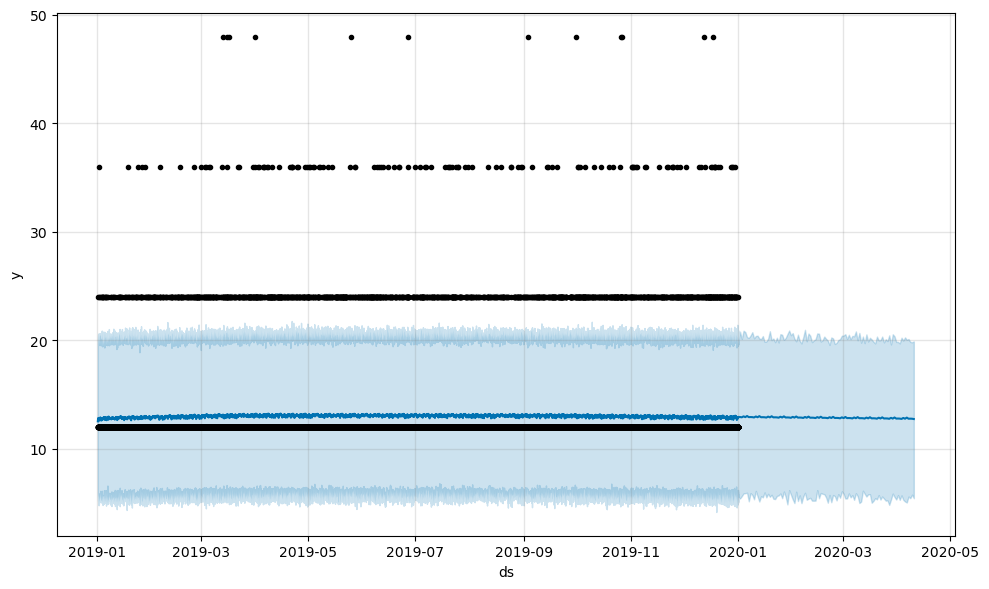

In [86]:
plot1 = model.plot(forecast)

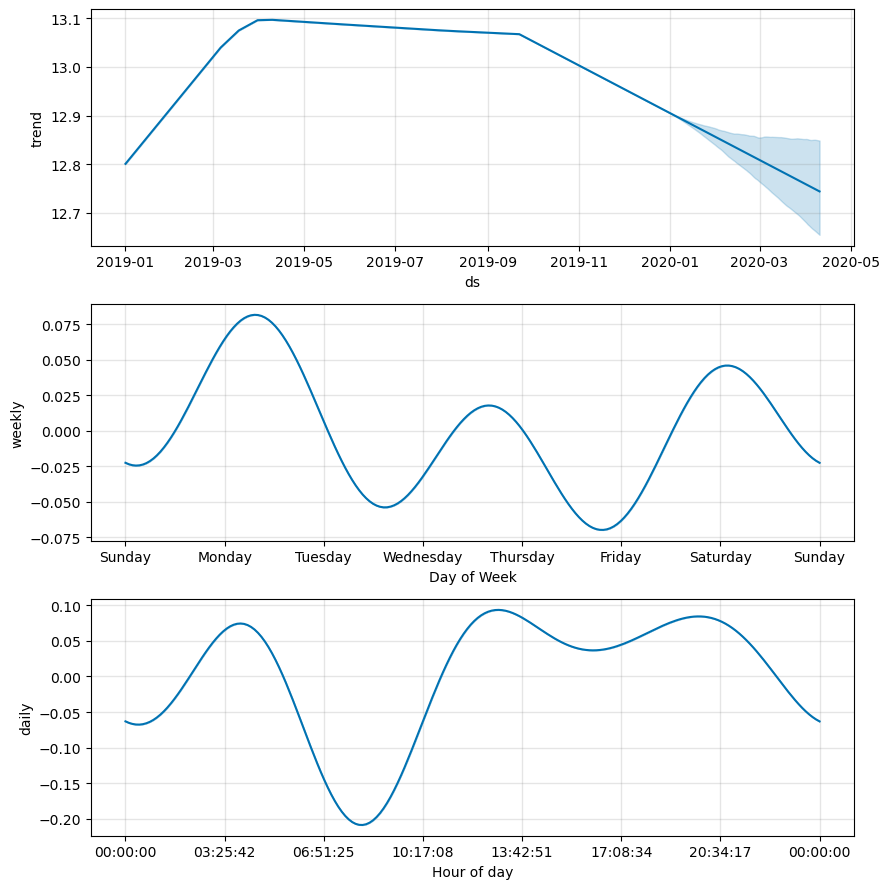

In [87]:
plt2 = model.plot_components(forecast)